In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

encoder=LabelEncoder()

In [2]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Cleaning

In [4]:
#Creating a new dataframe by filtering out unwanted columns

new_df=df.filter(['v1','v2'])

In [5]:
new_df['v1']=encoder.fit_transform(new_df['v1'])

In [6]:
new_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Dropping duplicate values

new_df=(new_df.drop_duplicates(keep='first'))

Exploratory data analysis (EDA)

<AxesSubplot:ylabel='v1'>

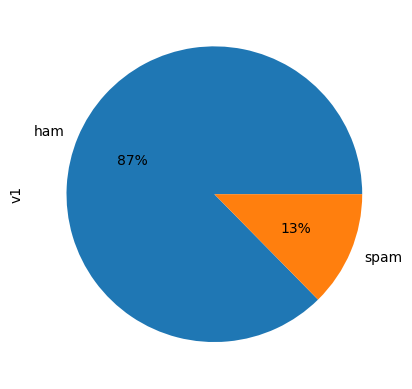

In [8]:
new_df['v1'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct='%1.0f%%') #'0' represents ham and '1' represents spam

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='v1', ylabel='Density'>

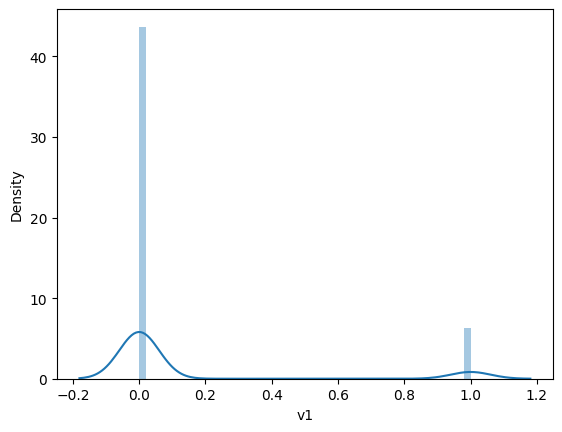

In [9]:
sns.distplot(new_df['v1'])

In [10]:
# Calculating number of characters, number of words and number of sentences in entire v2 text column

new_df['number_of_characters']=new_df['v2'].apply(len)

In [11]:
new_df['number_of_words']=new_df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [12]:
new_df['number_of_sentences']=new_df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [13]:
new_df.head()

,v1,v2,number_of_characters,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:xlabel='v1'>

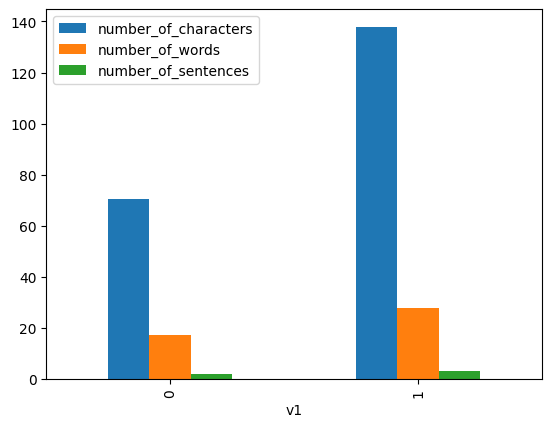

In [14]:
#Simple data visualization for 'ham' and 'spam' messages

new_df.groupby('v1').mean().plot(kind='bar')

<AxesSubplot:xlabel='number_of_characters', ylabel='Count'>

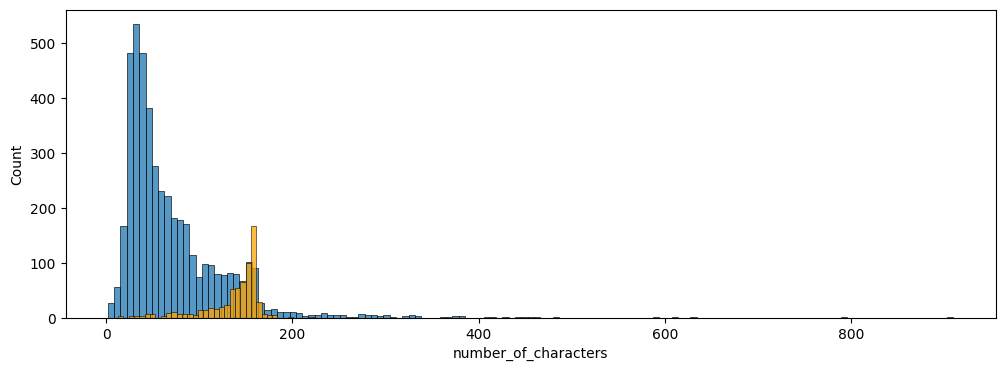

In [15]:
# Plotting histogram
plt.figure(figsize=(12,4))
sns.histplot(new_df[new_df['v1']==0]['number_of_characters'])
sns.histplot(new_df[new_df['v1']==1]['number_of_characters'],color='orange')


<AxesSubplot:xlabel='number_of_words', ylabel='Count'>

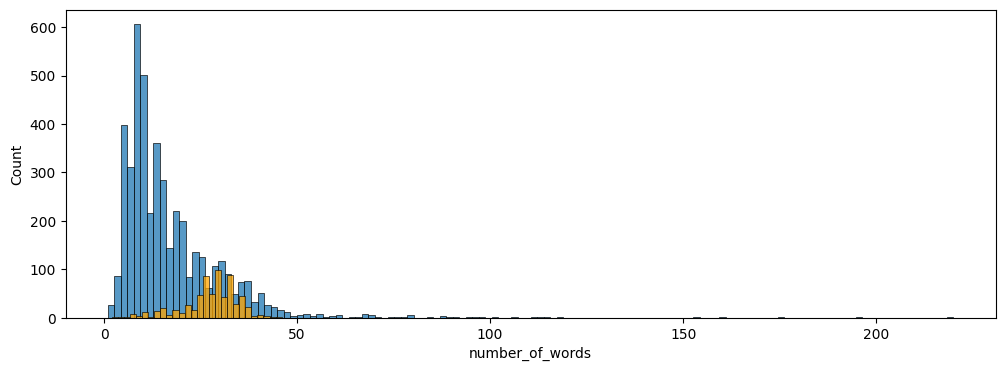

In [16]:
plt.figure(figsize=(12,4))
sns.histplot(new_df[new_df['v1']==0]['number_of_words'])
sns.histplot(new_df[new_df['v1']==1]['number_of_words'],color='orange')

<AxesSubplot:>

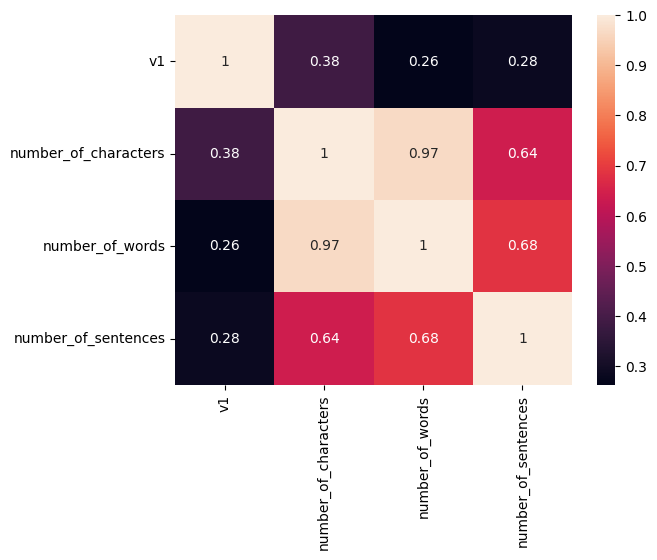

In [17]:
#Plotting a heatmap to understand correlation

sns.heatmap(new_df.corr(),annot=True)

Text Pre-Processing

In [18]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [19]:
def text_pre_process(text):
    sample_list=[]
    filtered_sentence=[]
    final_preprocessed_list=[]
    text=text.lower()
    text=word_tokenize(text)
    for i in text:
        if i.isalnum():
                sample_list.append(i)
    for w in sample_list:
        if w not in stop_words and w not in string.punctuation:
            filtered_sentence.append(w)
    for i in filtered_sentence:
        final_preprocessed_list.append(ps.stem(i))

    return " ".join(final_preprocessed_list)

In [20]:
new_df['pre-processed_text']=new_df['v2'].apply(text_pre_process)

In [21]:
new_df.head()

,v1,v2,number_of_characters,number_of_words,number_of_sentences,pre-processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [22]:
#Word cloud for spam and ham messages

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [23]:
spam_wordcloud = wc.generate(new_df[new_df['v1'] == 1]['pre-processed_text'].str.cat(sep=" "))

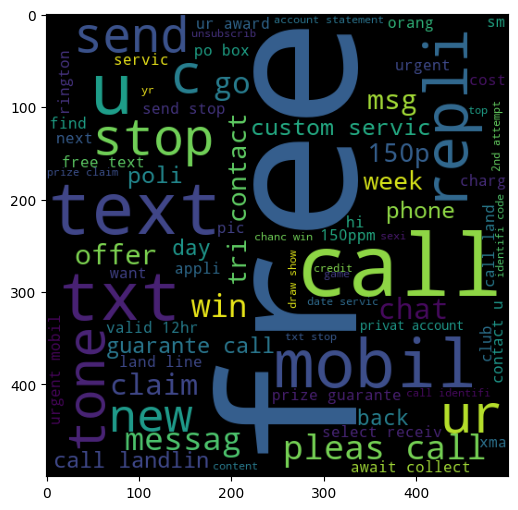

In [24]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wordcloud)

In [25]:
ham_wordcloud = wc.generate(new_df[new_df['v1'] == 0]['pre-processed_text'].str.cat(sep=" "))

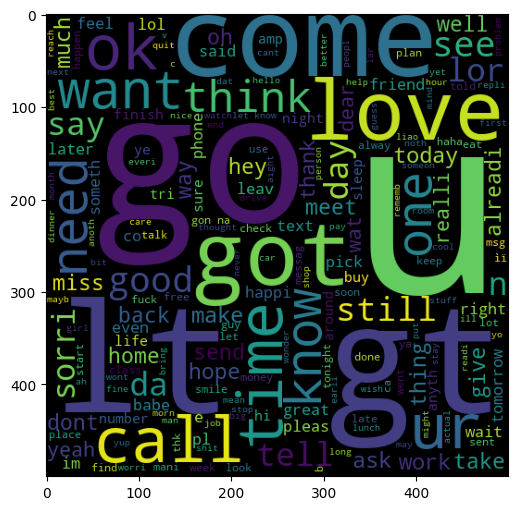

In [26]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wordcloud)

In [27]:
#Top 30 words in spam and ham messages

spam_corpus=[]
for i in new_df[new_df['v1']==1]['pre-processed_text'].to_list():
    for j in i.split():
        spam_corpus.append(j)

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


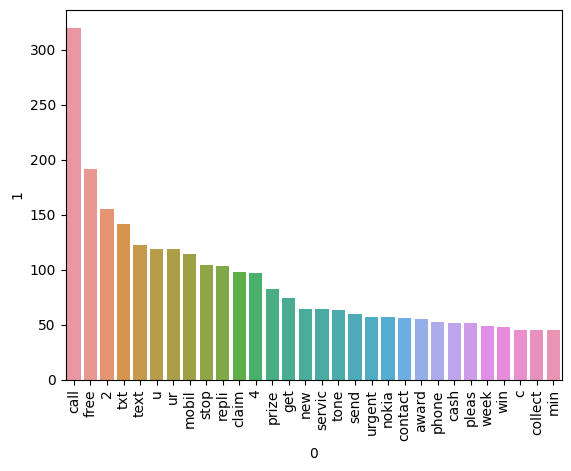

In [28]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
ham_corpus=[]
for i in new_df[new_df['v1']==0]['pre-processed_text'].to_list():
    for j in i.split():
        ham_corpus.append(j)

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


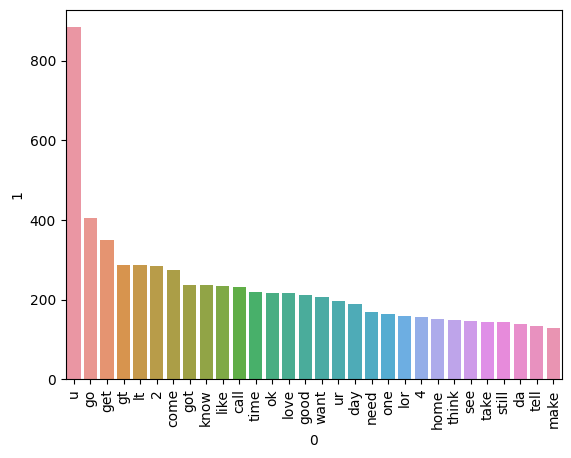

In [30]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [33]:
X = tfidf.fit_transform(new_df['pre-processed_text']).toarray()


In [34]:
y=new_df['v1'].values

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [36]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

mnb = MultinomialNB()
bnb = BernoulliNB()

In [37]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [38]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
import pickle
pickle.dump(tfidf,open('text_transformer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))